# Assignment 6

In this assignment, you'll analyze a collection of data sets from the [San Francisco Open Data Portal](http://data.sfgov.org/) and [Zillow](https://www.zillow.com/). The data sets have been stored in the SQLite database `sf_data.sqlite`, which you can [download here](http://anson.ucdavis.edu/~nulle/sf_data.sqlite). The database contains the following tables:

Table                   | Description
----------------------- | -----------
`crime`                 | Crime reports dating back to 2010.
`mobile_food_locations` | List of all locations where mobile food vendors sell.
`mobile_food_permits`   | List of all mobile food vendor permits. More details [here](https://data.sfgov.org/api/views/rqzj-sfat/files/8g2f5RV4PEk0_b24iJEtgEet9gnh_eA27GlqoOjjK4k?download=true&filename=DPW_DataDictionary_Mobile-Food-Facility-Permit.pdf).
`mobile_food_schedule`  | Schedules for mobile food vendors.
`noise`                 | Noise complaints dating back to August 2015.
`parking`               | List of all parking lots.
`parks`                 | List of all parks.
`schools`               | List of all schools.
`zillow`                | Zillow rent and housing statistics dating back to 1996. More details [here](https://www.zillow.com/research/data/).

The `mobile_food_` tables are explicitly connected through the `locationid` and `permit` columns. The other tables are not connected, but you may be able to connect them using dates, latitude/longitude, or postal codes.

Shapefiles for US postal codes are available [here](https://www.census.gov/geo/maps-data/data/cbf/cbf_zcta.html). These may be useful for converting latitude/longitude to postal codes.

Shapefiles for San Francisco Neighborhoods are available [here](https://data.sfgov.org/Geographic-Locations-and-Boundaries/SF-Find-Neighborhoods/pty2-tcw4).

__Exercise 1.1.__ Which mobile food vendor(s) sells at the most locations?

In [4]:
from sqlalchemy import create_engine
import pandas as pd

sf_conn = create_engine('sqlite:///sf_data.sqlite')

sql_query = """
SELECT Applicant, count(locationid)
FROM mobile_food_permits

JOIN mobile_food_schedule ON mobile_food_schedule.permit = mobile_food_permits.permit
GROUP BY mobile_food_schedule.permit
ORDER BY count(locationid) DESC
"""

pd.read_sql_query(sql_query, sf_conn).head()

,Applicant,count(locationid)
0,May Catering,340
1,Natan's Catering,221
2,Anas Goodies Catering,212
3,Liang Bai Ping,182
4,Mang Hang Catering,165


__Exercise 1.2.__ Ask and use the database to analyze 5 questions about San Francisco. For each question, write at least 150 words and support your answer with plots. Make a map for at least 2 of the 5 questions.

You should try to come up with some questions on your own, but these are examples of reasonable questions:

* Which parts of the city are the most and least expensive?
* Which parts of the city are the most dangerous (and at what times)?
* Are noise complaints and mobile food vendors related?
* What are the best times and places to find food trucks?
* Is there a relationship between housing prices and any of the other tables?

Please make sure to clearly state each of your questions in your submission.

1. Which parts of the city are the most and least expensive?

In [45]:
import geopandas as gpd
import shapely.geometry as geom
%matplotlib inline
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap


shp_fn = 'cb_2015_us_zcta510_500k.shp'  #shapefile
cities = gpd.read_file(shp_fn)

zips = cities[cities.ZCTA5CE10.str.startswith("9")]

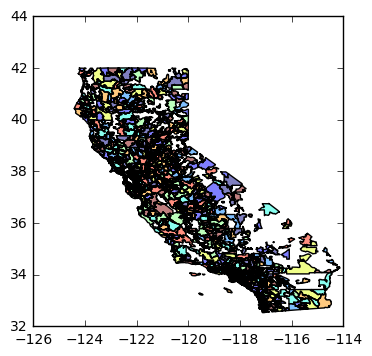

In [15]:
zips = zips[pd.to_numeric(zips.ZCTA5CE10) <= 96199]
zips.plot()

In [16]:
zips.head()

,AFFGEOID10,ALAND10,AWATER10,GEOID10,ZCTA5CE10,geometry
3,8600000US94929,2749903,0,94929,94929,"(POLYGON ((-122.968755 38.237523, -122.965434 ..."
4,8600000US96086,664958004,1492676,96086,96086,"POLYGON ((-123.40933 41.987242, -123.407847 41..."
7,8600000US92274,463277521,84803915,92274,92274,"(POLYGON ((-115.958114 33.276048, -115.955393 ..."
8,8600000US95472,179074645,105888,95472,95472,"POLYGON ((-123.008761 38.458527, -123.00646 38..."
16,8600000US93908,555777564,6598778,93908,93908,"POLYGON ((-121.78964 36.725438, -121.787722 36..."


In [41]:
region_median_price = pd.read_sql_query("select RegionName, avg(zillow.MedianSoldPricePerSqft_AllHomes) median_sqft from zillow group by RegionName", sf_conn)
region_median_price.head()

,RegionName,median_sqft
0,94080,375.629802
1,94102,626.417276
2,94103,604.009929
3,94104,1336.128581
4,94105,798.257824


In [42]:
new_zips = zips.reset_index()
new_zips.join(region_median_price.set_index('RegionName'), on = 'ZCTA5CE10', how = 'left')

,index,AFFGEOID10,ALAND10,AWATER10,GEOID10,ZCTA5CE10,geometry,median_sqft
0,3,8600000US94929,2749903,0,94929,94929,"(POLYGON ((-122.968755 38.237523, -122.965434 ...",NaN
1,4,8600000US96086,664958004,1492676,96086,96086,"POLYGON ((-123.40933 41.987242, -123.407847 41...",NaN
2,7,8600000US92274,463277521,84803915,92274,92274,"(POLYGON ((-115.958114 33.276048, -115.955393 ...",NaN
3,8,8600000US95472,179074645,105888,95472,95472,"POLYGON ((-123.008761 38.458527, -123.00646 38...",NaN
4,16,8600000US93908,555777564,6598778,93908,93908,"POLYGON ((-121.78964 36.725438, -121.787722 36...",NaN
5,76,8600000US95669,228731010,203331,95669,95669,"POLYGON ((-121.027406 38.503812, -121.027507 3...",NaN
6,77,8600000US93501,424305028,267983,93501,93501,"(POLYGON ((-118.126838 35.120842, -118.11955 3...",NaN
7,78,8600000US95939,792187452,8000853,95939,95939,"(POLYGON ((-122.761023 39.634337, -122.759567 ...",NaN
8,79,8600000US90038,4057213,3325,90038,90038,"POLYGON ((-118.345153 34.085261, -118.344052 3...",NaN
9,80,8600000US90016,9394067,8302,90016,90016,"POLYGON ((-118.381945 34.020965, -118.377952 3...",NaN


In [44]:
new_zips.plot(column='median_sqft')

#2: Which parts of the city are the most dangerous (and at what times)?

#3: Are noise complaints and mobile food vendors related?

In [ ]:
# look at datetime from noise, startHour and endHour from mobile_food_schedule
# address? or long/lat
# somehow find a way to find the locations of food trucks and locations of noise complains
# score somehow by severity of noise leve

#4: What are the best times and places to find food trucks?

In [ ]:
# average startHour and endHour?
# find which long/lat are close to each other
# visualize long/lat for food trucks
# color scale by what times they are available, or make bokeh #swag

#5: Is there a relationship between housing prices and any of the other tables?

In [ ]:
# look at school ofc, crime, parking maybe?